In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
# Load the dataset
df = pd.read_csv("boston_house_prices_1000.csv")
df.head()
X = df.drop(columns=["PRICE"]).to_numpy()
y = df["PRICE"].to_numpy()
feature_names = df.drop(columns=["PRICE"]).columns.tolist()

In [9]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

In [ ]:
# evaluating model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_pred=y_pred, y_true=y_test)

print("mean_squared_error: ", mse)
print("r2 scrore: ", r2)

mean_squared_error:  27.96448397571502
r2 scrore:  0.6576373698698417


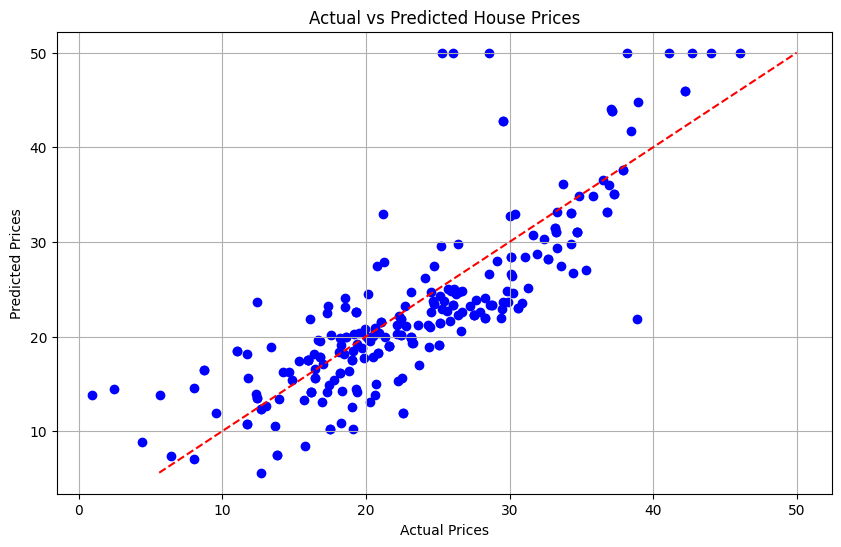

In [15]:
# Actual vs Predicted Price
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

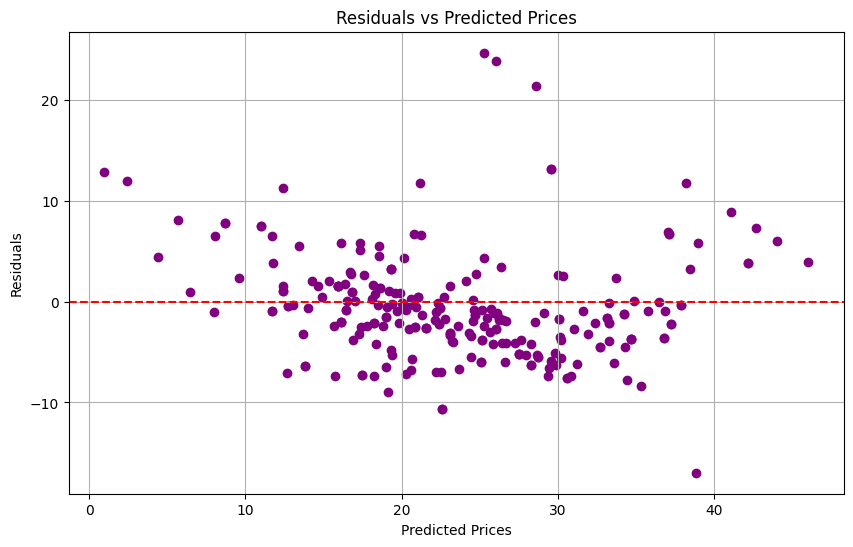

In [16]:
# residual plotting
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.show()


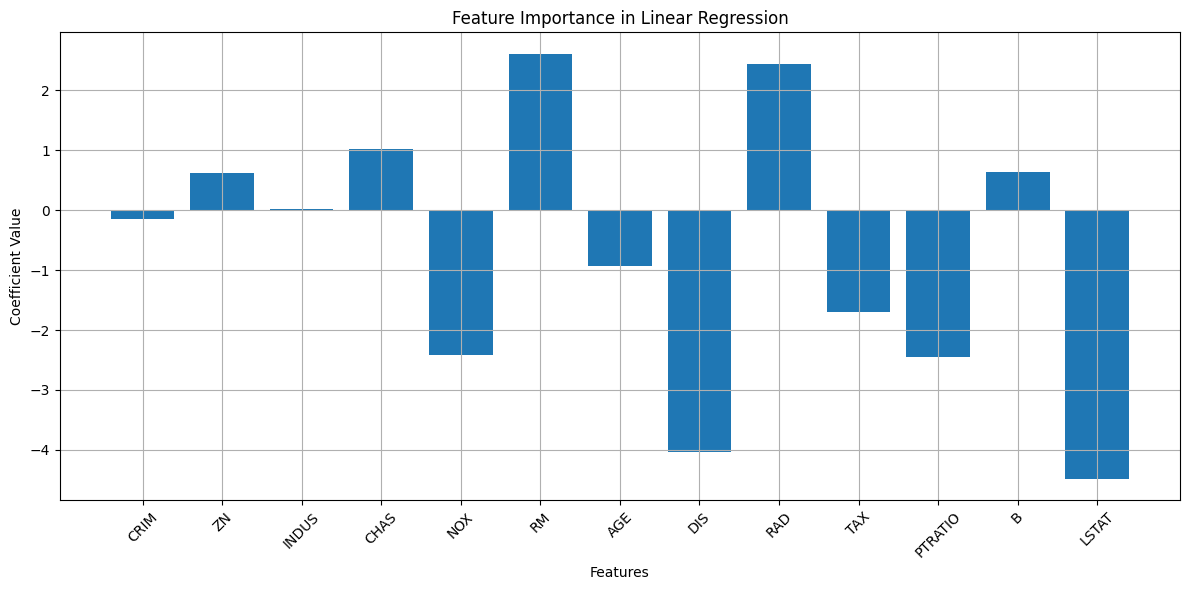

In [17]:
# feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, model.coef_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()
